In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

In [2]:
#Merging 12 months of 12 data set into single file
files= [file for file in os.listdir("./Sales_Data")]
all_months_data= pd.DataFrame()

for file in files:
    df= pd.read_csv("./Sales_Data/"+ file)
    all_months_data= pd.concat([all_months_data, df])
all_months_data.to_csv("All_months.csv", index=False)    
    

In [3]:
data= pd.read_csv("All_months.csv")
data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"
...,...,...,...,...,...,...
186845,222905,AAA Batteries (4-pack),1,2.99,06/07/19 19:02,"795 Pine St, Boston, MA 02215"
186846,222906,27in FHD Monitor,1,149.99,06/01/19 19:29,"495 North St, New York City, NY 10001"
186847,222907,USB-C Charging Cable,1,11.95,06/22/19 18:57,"319 Ridge St, San Francisco, CA 94016"
186848,222908,USB-C Charging Cable,1,11.95,06/26/19 18:35,"916 Main St, San Francisco, CA 94016"


In [4]:
# what was the best month for sales? How much was earned that month
##Add Month Column 
#data.columns = data.columns.str.replace(' ', '')
data= data.dropna(how='all') ## drop NAN values

In [5]:
data= data[data['Order Date'].str[0:2]!='Or']

In [6]:
data['Month']= data['Order Date'].str[0:2]
data['Month']= data['Month'].astype('int32')
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001",12
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12


In [7]:
## Add Sales column 
data['Quantity Ordered']= data['Quantity Ordered'].astype('int')
data['Price Each']= data['Price Each'].astype('float')

In [8]:
data['Sales']= data['Quantity Ordered'] * data['Price Each']
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",12,1700.00
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12,600.00
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12,11.95
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12,149.99
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12,11.95


In [9]:
result= data.groupby('Month').sum()
#Dec was the best month for sales

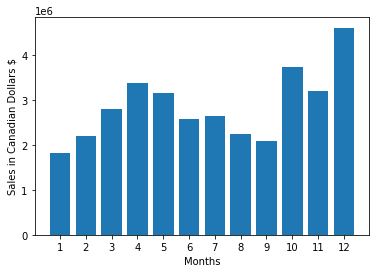

In [10]:
months= range(1,13)
plt.bar(months, result['Sales'])
plt.xticks(months)
plt.xlabel("Months")
plt.ylabel("Sales in Canadian Dollars $")
plt.show()

In [11]:
## Which city has maximum number of Sales

In [12]:
data['City']= data['Purchase Address'].apply(lambda x: x.split(',')[1]) + ' ' + data['Purchase Address'].apply(lambda x: x.split(',')[2].split(' ')[1])
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",12,1700.00,New York City NY
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12,600.00,New York City NY
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12,11.95,New York City NY
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco CA
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta GA


In [13]:
result= data.groupby('City').sum()
result

,Quantity Ordered,Price Each,Month,Sales
City,,,,
Atlanta GA,16602,2.779908e+06,104794,2.795499e+06
Austin TX,11153,1.809874e+06,69829,1.819582e+06
Boston MA,22528,3.637410e+06,141112,3.661642e+06
Dallas TX,16730,2.752628e+06,104620,2.767975e+06
Los Angeles CA,33289,5.421435e+06,208325,5.452571e+06
New York City NY,27932,4.635371e+06,175741,4.664317e+06
Portland ME,2750,4.471893e+05,17144,4.497583e+05
Portland OR,11303,1.860558e+06,70621,1.870732e+06
San Francisco CA,50239,8.211462e+06,315520,8.262204e+06


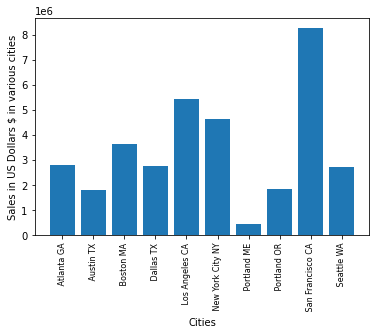

In [14]:
cities= [x for x, data in data.groupby('City')]
plt.bar(cities, result['Sales'])
plt.xlabel("Cities")
plt.xticks(cities, rotation="vertical", size=8)
plt.ylabel("Sales in US Dollars $ in various cities")
plt.show()

In [15]:
#Q3: what time should we display advertising to maximize likelihood of customer buying product


In [17]:
# data['time']= data['Order Date'].apply(lambda x: x.split('/')[2].split(' ')[1])
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",12,1700.00,New York City NY
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12,600.00,New York City NY
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12,11.95,New York City NY
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco CA
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta GA


In [19]:
data['Order Date']= pd.to_datetime(data['Order Date'])


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,New York City NY
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,New York City NY
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,New York City NY
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco CA
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta GA


In [22]:
data['Hour']= data['Order Date'].dt.hour
data['Minute']= data['Order Date'].dt.minute
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,New York City NY,0,1
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,New York City NY,7,3
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,New York City NY,18,21
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco CA,15,13
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta GA,12,38


In [32]:
data.groupby(["Hour"]).count()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Minute
Hour,,,,,,,,,,
0,3910,3910,3910,3910,3910,3910,3910,3910,3910,3910
1,2350,2350,2350,2350,2350,2350,2350,2350,2350,2350
2,1243,1243,1243,1243,1243,1243,1243,1243,1243,1243
3,831,831,831,831,831,831,831,831,831,831
4,854,854,854,854,854,854,854,854,854,854
5,1321,1321,1321,1321,1321,1321,1321,1321,1321,1321
6,2482,2482,2482,2482,2482,2482,2482,2482,2482,2482
7,4011,4011,4011,4011,4011,4011,4011,4011,4011,4011
8,6256,6256,6256,6256,6256,6256,6256,6256,6256,6256


Text(0, 0.5, 'Number of Orders')

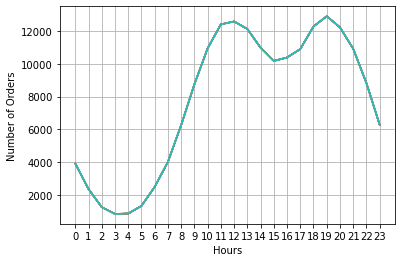

In [37]:
hour= [hours for hours, x in data.groupby('Hour')]
plt.plot(hour, data.groupby('Hour').count())
plt.xticks(hour)
plt.grid()
plt.xlabel("Hours")
plt.ylabel("Number of Orders")
#ans-3: My recommndation is around 12noon and 6-7 pm.

In [ ]:
#Q4 What products are often sold together

In [38]:
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,New York City NY,0,1
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,New York City NY,7,3
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,New York City NY,18,21
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco CA,15,13
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta GA,12,38


In [43]:
df= data[data['Order ID'].duplicated(keep=False)]
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
16,295681,Google Phone,1,600.00,2019-12-25 12:37:00,"79 Elm St, Boston, MA 02215",12,600.00,Boston MA,12,37
17,295681,USB-C Charging Cable,1,11.95,2019-12-25 12:37:00,"79 Elm St, Boston, MA 02215",12,11.95,Boston MA,12,37
18,295681,Bose SoundSport Headphones,1,99.99,2019-12-25 12:37:00,"79 Elm St, Boston, MA 02215",12,99.99,Boston MA,12,37
19,295681,Wired Headphones,1,11.99,2019-12-25 12:37:00,"79 Elm St, Boston, MA 02215",12,11.99,Boston MA,12,37
36,295698,Vareebadd Phone,1,400.00,2019-12-13 14:32:00,"175 1st St, New York City, NY 10001",12,400.00,New York City NY,14,32
...,...,...,...,...,...,...,...,...,...,...,...
186820,222882,AA Batteries (4-pack),1,3.84,2019-06-18 11:37:00,"990 Walnut St, Los Angeles, CA 90001",6,3.84,Los Angeles CA,11,37
186822,222884,Google Phone,1,600.00,2019-06-04 12:06:00,"819 Pine St, New York City, NY 10001",6,600.00,New York City NY,12,6
186823,222884,USB-C Charging Cable,1,11.95,2019-06-04 12:06:00,"819 Pine St, New York City, NY 10001",6,11.95,New York City NY,12,6
186842,222903,iPhone,1,700.00,2019-06-07 22:21:00,"685 Hickory St, New York City, NY 10001",6,700.00,New York City NY,22,21
